In [0]:
import requests
import time
import re
from textblob import TextBlob, Word
import numpy as np
import scrapy
from scrapy.http import TextResponse
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
import nltk
from collections import Counter
import collections
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from selenium import webdriver

1) Scrape all the latest news headings (and publication time) from https://www.tert.am/en
and answer the following questions:

a) What are the top most frequent words? (not stopword),

b) How many typical Armenian surnames can be counted in titles? (assume surname in
any word starting with an uppercase and ending with “yan”),

c) In what part of the day are most of the articles published? (you may provide some
range such as from 10am to 11am).

In [0]:
from selenium import webdriver

In [0]:
url_tert = "https://www.tert.am/en/news/"

In [0]:
response=requests.get(url_tert)

In [0]:
print(response.status_code)

200


In [0]:
response=TextResponse(url=response.url,body=response.text,encoding="utf-8")

In [0]:
headings = response.css("span[class='list__title db fb fs15']::text").extract()

In [0]:
len(headings)

In [0]:
time = response.css("span[class='list__date ver-top-box fb fs12']::text").extract()

In [0]:
len(time)

30

In [0]:
base_url="https://www.tert.am/en/news/"
all_urls=[base_url+"{}?from_date=&to_date=".format(i) for i in range(1,100)]

In [0]:
len(all_urls)

99

In [0]:
def news_scraper(url):
    page=requests.get(url)
    response=TextResponse(url=page.url,body=page.text,encoding="utf-8")
    headings = response.css("span[class='list__title db fb fs15']::text").extract()
    return headings

In [0]:
try1 = news_scraper("https://www.tert.am/en/news/9?from_date=&to_date=") #getting sure function works

In [0]:
all_news=[]
for i in all_urls:
    news=news_scraper(i)
    all_news.extend(news)
    time.sleep(2)

In [0]:
len(all_news)

2970

In [0]:
def time_scraper(url):
    page=requests.get(url)
    response=TextResponse(url=page.url,body=page.text,encoding="utf-8")
    time = response.css("span[class='list__date ver-top-box fb fs12']::text").re("\d\d:+")
    return time

In [0]:
all_time=[]
for i in all_urls:
    time=time_scraper(i)
    all_time.extend(time)
    time.sleep(2)

In [0]:
len(all_time) #as two lenghts are equal, assuming everything is correct so far

2970

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
stop_words = set(stopwords.words('english'))

In [0]:
stop_words = nltk.corpus.stopwords.words('english')
newStopWords=[",","``","\''","’",":","'s","‘","–","$","\'"] #for excluding also punctuation marks
stop_words.extend(newStopWords)

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
words = nltk.word_tokenize(str(all_news))

In [0]:
cleaned_news=[] 
for word in words: 
    if word not in stop_words:
        cleaned_news.append(word)

In [0]:
print(cleaned_news)

['[', "'Armenia", 'participate', 'Dubai', 'EXPO', '2020', "'French", 'inventor', 'crashes', 'water', 'failed', 'flight', 'across', 'English', 'Channel', '90mph', 'Hoverboard', "'European", 'court', 'orders', 'Armenia', 'pay', '€1,600,000', 'compensation', 'citizen', 'alienated', 'property', 'rights', 'Sevan', 'Startup', 'Summit', 'open', 'public', "'for", 'first', 'time', 'ever', '2019', "'Boris", 'Johnson', 'promises', 'bold', 'new', 'Brexit', 'deal', "'Hurghada-Yerevan", 'flight', 'canceled', 'due', 'tour', 'operator', 'failure', 'pay', 'fees', "'Tunisian", 'President', 'Beji', 'Caid', 'Essebsi', 'dies', 'aged', '92', "'Armenian", 'passengers', 'stranded', 'Egyptian', 'airport', 'amid', 'cancelled', 'flight', "'Russian", 'State', 'Duma', 'ratifies', 'amendments', 'CSTO', 'Charter', 'SpaceX', 'starhopper', 'Rocket', 'Prototype', 'Aborts', '1st', 'Untethered', 'Hop', 'Attempt', 'Armenian', 'parliamentary', 'delegation', 'meetings', 'top', 'US', 'legislators', "'reflects", 'Congress', '

In [0]:
counter = collections.Counter(cleaned_news) 
print(counter.most_common(50))

[('Armenia', 306), ('Armenian', 168), ("'Armenian", 149), ('says', 125), ('US', 118), ('minister', 107), ('new', 106), ('Pashinyan', 88), ("'Armenia", 86), ('president', 84), ("'US", 80), ('Artsakh', 80), ('Trump', 79), ('Karabakh', 71), ('Russian', 67), ('peace', 67), ('first', 63), ('2019', 60), ('Genocide', 59), ('parliament', 58), ('Yerevan', 57), ('Azerbaijani', 56), ('cooperation', 55), ('Russia', 53), ('-', 53), ('Turkey', 51), ('Iran', 50), ('Azerbaijan', 48), ('government', 46), ('talks', 45), ('dies', 44), ('military', 44), ('prime', 44), ('Syria', 42), ('official', 42), ('hosts', 41), ('visit', 41), ('EU', 38), ("'Trump", 37), ('court', 36), ('named', 36), ('Ministry', 36), ('New', 34), ('discussed', 34), ('Kardashian', 32), ('leader', 32), ('The', 32), ('years', 32), ('President', 31), ('amid', 31)]


In [0]:
surnames = re.findall("[A-Z]..?....yan",str(cleaned_news))  

In [0]:
len(surnames)

205

In [0]:
counter = collections.Counter(all_time) 
print(counter.most_common(50)) #most common posting time is after 11:00

[('11:', 379), ('12:', 350), ('10:', 343), ('09:', 341), ('14:', 304), ('15:', 300), ('16:', 294), ('17:', 289), ('13:', 281), ('18:', 76), ('08:', 6), ('19:', 2), ('00:', 2), ('23:', 1), ('21:', 1), ('22:', 1)]


2) Scrape all jobs and companies from https://staff.am/en/jobs and answer the following
questions:

a) Which company has the highest number of job postings?

b) How many postings does this company have?

c) Which company has the highest number of “developer” (or related) job postings?

In [0]:
url_staff = "https://staff.am/en/jobs"

In [0]:
response=requests.get(url_staff)

In [0]:
print(response.status_code)

200


In [0]:
response=TextResponse(url=response.url,body=response.text,encoding="utf-8")

In [0]:
jobs=response.css("p[class='font_bold']::text").extract()
companies=response.css("p[class='job_list_company_title']::text").extract()

In [0]:
len(companies)

50

In [0]:
base_url="https://staff.am/en/"
all_urls=[base_url+"jobs?page={}&per-page=50".format(i) for i in range(1,10)]

In [0]:
def company_scraper(url):
    page=requests.get(url)
    response=TextResponse(url=page.url,body=page.text,encoding=
             "utf-8")
    company=response.css("p[class='job_list_company_title']::text").extract()
    return company

In [0]:
all_companies=[] 
for i in all_urls:
    company=company_scraper(i)
    all_companies.extend(company)
    time.sleep(2)

In [0]:
len(all_companies)

450

In [0]:
counter = collections.Counter(all_company) #"ՀՀ կրթության, գիտության, մշակույթի և սպորտի նախարարություն" has most posted 29 job positions
print(counter.most_common(1))

[('ՀՀ կրթության, գիտության, մշակույթի և սպորտի նախարարություն', 29)]


In [0]:
def jobs_scraper(url):
    page=requests.get(url)
    response=TextResponse(url=page.url,body=page.text,encoding="utf-8")
    jobs=response.css("p[class='font_bold']::text").extract()
    return jobs

In [0]:
all_jobs=[]
for i in all_urls:
    jobs=jobs_scraper(i)
    all_jobs.extend(jobs)
    time.sleep(2)

In [0]:
len(all_jobs)

In [0]:
combined={key:value for key,value in zip(all_company, all_jobs)}
print(combined)

{'ՀՀ Վարչապետի աշխատակազմի Անվտանգության խորհրդի գրասենյակ': 'Պետական, հասարակական անվտանգության բաժնի պետ', 'SEASONS': 'Restaurant hostess ', 'International Republican Institute': 'Senior Program Manager (SPM)', 'BetConstruct': 'Translator (Arabic Language)', 'Galaxy Group of Companies': 'Administrative assistant', '2mindS': 'Experienced Accountant', 'IYC technologies': ' Mid/Senior Front-End Developer', 'All.me LLC': 'Head of Backend', 'GAT Cutting LLC': '3D մոդելավորող', 'Workfront Armenia': 'Quality Engineer', 'Ameriabank CJSC': 'HR specialist, Employment relations and Benefits team', 'Synopsys Armenia ': 'R&D Manager / 21077BR', 'TIDEPOOL LABS': 'DevOps Engineer', 'SEF International UCO ': 'Ոսկերիչ գնահատող', 'Ավանտա նորարարական բժշկության կենտրոն': 'Բուժքույր', 'Թոփ Շինտեխ ՍՊԸ': 'Օբյեկտ մենեջեր ', 'Agrotech LLC': 'Կենսաքիմիկ / կենսաֆիզիկ', 'ID Bank CJSC': 'Call Center specialist', 'ՀՀ կրթության, գիտության, մշակույթի և սպորտի նախարարություն': '«Երևանի թիվ 175 միջնակարգ դպրոց» ՊՈԱԿ

In [0]:
company_job = str(combined)

In [0]:
developers = re.findall("..........eveloper.........",company_job)

In [0]:
len(developers)

29

In [0]:
print(developers)

3) Scrape the table with exchange rates from rates.am for the first 2 weeks of July (can be
done both with and without Selenium).

a) What is the average USD rate for this duration?

b) Plot the average daily USD rate over time.

In [0]:
base_url="https://rate.am/am/armenian-dram-exchange-rates/banks/"
all_urls1=[base_url+"non-cash/2019/07/0{}/09-30".format(i) for i in range(1,10)]
all_urls2 = [base_url+"non-cash/2019/07/1{}/09-30".format(i) for i in range(0,5)]

In [0]:
all_urls = all_urls1 + all_urls2

In [0]:
len(all_urls) #2 weeks - 14 days

14

In [0]:
print(all_urls)

['https://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2019/07/01/09-30', 'https://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2019/07/02/09-30', 'https://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2019/07/03/09-30', 'https://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2019/07/04/09-30', 'https://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2019/07/05/09-30', 'https://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2019/07/06/09-30', 'https://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2019/07/07/09-30', 'https://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2019/07/08/09-30', 'https://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2019/07/09/09-30', 'https://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2019/07/10/09-30', 'https://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2019/07/11/09-30', 'https://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2019/07/12/09-30', 'ht

In [0]:
browser = webdriver.Chrome()

In [0]:
browser.get(all_urls[0])

In [0]:
page = browser.page_source

In [0]:
day1 = pd.read_html(all_urls[0])

In [0]:
day1

In [0]:
rate_buy1 = np.array(day1[3][5][2:19])

NameError: ignored

In [0]:
day1[3][5][1:19]

In [0]:
rate_buy1

array(['475', '475.50', '475.50', '475.50', '475.50', '475.50', '475.50',
       '475.50', '476', '475.50', '475.50', '476', '475.50', '475.25',
       '476', '475', '475'], dtype=object)

In [0]:
def rate_scraper(url):
    browser = webdriver.Chrome()
    browser.get(url)
    page = browser.page_source
    day = pd.read_html(url)
    rate = np.array(day[3][5][2:19]) # rate assumes Buying rate, 5 stands for Buy, and 6 for Sell,
                                        #same function can be used for Sell as well
    rate = np.array([float(rate[i]) for i in range(len(rate))])
    mean = rate.mean()
    return mean

In [0]:
rate1 = rate_scraper(all_urls[0])

In [0]:
all_means = np.array([])  #I tried to use command for closing browser, but it returned an error, so I proceeded without it
for i in all_urls:
    mean = rate_scraper(i)
    all_means = np.append(all_means,mean)
    time.sleep(3)
    print(all_means)

[475.48529412]
[475.48529412 475.23529412]
[475.48529412 475.23529412 475.29411765]
[475.48529412 475.23529412 475.29411765 475.32352941]
[475.48529412 475.23529412 475.29411765 475.32352941 475.35294118]
[475.48529412 475.23529412 475.29411765 475.32352941 475.35294118
 475.29411765]
[475.48529412 475.23529412 475.29411765 475.32352941 475.35294118
 475.29411765 475.29411765]
[475.48529412 475.23529412 475.29411765 475.32352941 475.35294118
 475.29411765 475.29411765 475.29411765]
[475.48529412 475.23529412 475.29411765 475.32352941 475.35294118
 475.29411765 475.29411765 475.29411765 475.26470588]
[475.48529412 475.23529412 475.29411765 475.32352941 475.35294118
 475.29411765 475.29411765 475.29411765 475.26470588 475.27941176]
[475.48529412 475.23529412 475.29411765 475.32352941 475.35294118
 475.29411765 475.29411765 475.29411765 475.26470588 475.27941176
 475.22058824]
[475.48529412 475.23529412 475.29411765 475.32352941 475.35294118
 475.29411765 475.29411765 475.29411765 475.264

In [0]:
len(all_means)

14

In [0]:
all_means.mean() # mean for 14 days

475.27310924369743

In [0]:
Days = np.array([str(i+1) for i in range(14)])

In [0]:
Rates = all_means

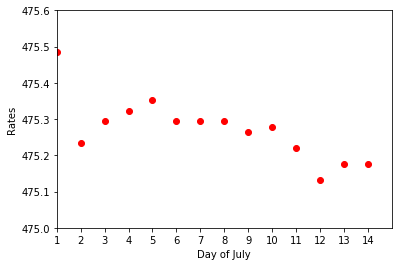

In [0]:
plt.plot(Days, Rates, 'ro')
plt.ylabel("Rates")
plt.xlabel("Day of July")
plt.axis([0, 14, 475, 475.6])
plt.show()